In [1]:
from ipynb.fs.full.Utils import load_dataset, scale_data, split_data
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import losses, optimizers
from keras.callbacks import EarlyStopping

/opt/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
from sklearn import preprocessing
from sklearn import datasets
from sklearn import model_selection

In [4]:
df = load_dataset(split=False)

In [5]:
metal = df[df.category == 'metal']
country = df[df.category == 'country']
df = metal.append(country)

In [6]:
df.shape

(1521, 25)

In [7]:
x = df.drop(['category'], axis=1)
y = pd.get_dummies(df['category'])

In [8]:
countries = np.sum(y == 1)
metals = np.sum(y == 0)
print("Country songs: ", countries)
print("Metal songs: ", metals)

Country songs:  country    771
metal      750
dtype: int64
Metal songs:  country    750
metal      771
dtype: int64


In [9]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, train_size=0.7, stratify=y)

/opt/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [10]:
number_of_classes = len(df['category'].unique())

In [11]:
y_train.shape
y_test.shape

(457, 2)

In [12]:
x_train.shape

(1064, 24)

In [13]:
number_of_features = x_train.shape[1]
output_size = number_of_classes

In [14]:
x_train, x_test = scale_data(x_train, x_test)

In [15]:
model = Sequential()

In [16]:
model.add(Dense(units = 60, input_dim = number_of_features, activation = 'relu'))

In [17]:
model.add(Dense(units=30, activation='relu'))

In [18]:
model.add(Dense(units = output_size, activation='softmax'))

In [19]:
model.compile(optimizer='adam', loss=losses.binary_crossentropy, metrics=['accuracy'])

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 60)                1500      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 62        
Total params: 3,392
Trainable params: 3,392
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model.fit(x_train, y_train, epochs= 20, batch_size=32, verbose=0, validation_split=0.3, \
                    callbacks=[EarlyStopping(patience=3)])

In [22]:
epochs = history.epoch

In [23]:
loss = history.history['loss']
validation_loss = history.history['val_loss']

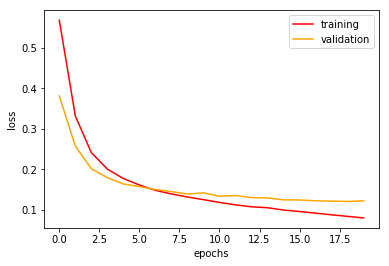

In [24]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(epochs, loss, c='red', label='training')
plt.plot(epochs, validation_loss, c='orange', label='validation')
plt.legend(loc='best')

In [25]:
acc = history.history['acc']
validation_acc = history.history['val_acc']

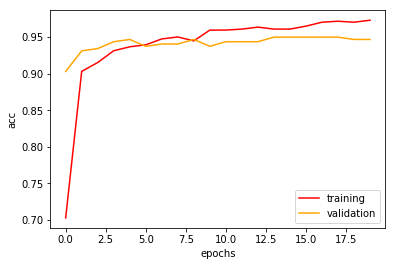

In [26]:
plt.xlabel('epochs')
plt.ylabel('acc')
plt.plot(epochs, acc, c='red', label='training')
plt.plot(epochs, validation_acc, c='orange', label='validation')
plt.legend(loc='best')

In [27]:
# evaluacija mreze
test_loss, test_acc = model.evaluate(x_test, y_test)
print ("Test loss: {}, test accuracy: {}".format(test_loss, test_acc))

457/457 [==============================] - 0s 215us/step
Test loss: 0.17802565254646005, test accuracy: 0.9343544857768052


In [28]:
#model.fit(x_train, y_train, epochs=12, batch_size=32)

In [29]:
print(x_test[1:2])
print(y_test[1:2]) # metal

[[ 0.40119323  0.67273542  0.45137592 -1.61077453  1.27979527 -0.33859491
  -0.23532299 -0.28348109 -0.27466222 -0.33922224 -0.37375073  0.21276462
  -0.31671792 -0.24661214 -0.28513297 -0.29277002 -0.33437663 -0.32207831
  -0.23122575 -0.31129924 -0.28320142  3.28971461 -0.4051096  -0.2612912 ]]
     country  metal
518        0      1


In [30]:
model.predict(x_test[2:3])

array([[1.2944361e-06, 9.9999869e-01]], dtype=float32)

In [31]:
# model je ispravno pogodio!